In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
organizacion_df = pd.read_csv('data/organizacion.csv')
geografia_df = pd.read_csv('data/geografia.csv')
cliente_df = pd.read_csv('data/cliente.csv')
producto_df = pd.read_csv('data/producto.csv')
tiempo_df = pd.read_csv('data/tiempo.csv')
hechos_df = pd.read_csv('data/hechos.csv')

# Actividad 2

In [103]:
producto_df.head()

,Llave_producto,Tipo_producto_id,Tipo_producto_desc,producto_id,producto_desc,numero_cuenta,tasa_interes,saldo_minimo
0,40001,4001,Checking,401,Regular Checking,57750,0.04,1000
1,40002,4001,Checking,401,Regular Checking,18858,0.04,1000
2,40003,4001,Checking,401,Regular Checking,88840,0.04,1000
3,40004,4001,Checking,401,Regular Checking,49239,0.04,1000
4,40005,4001,Checking,401,Regular Checking,23774,0.04,1000


In [116]:
producto_df.Tipo_producto_desc.unique()

array(['Checking', 'Saving', 'Mortgage', 'Personal Loan'], dtype=object)

In [111]:
mortgage_df = producto_df[producto_df.Tipo_producto_desc == 'Mortgage']
mortgage_df.head()

,Llave_producto,Tipo_producto_id,Tipo_producto_desc,producto_id,producto_desc,numero_cuenta,tasa_interes,saldo_minimo
270,40271,4003,Mortgage,411,30 Year Mortgage,37166,0.05,0
271,40272,4003,Mortgage,411,30 Year Mortgage,72855,0.05,0
272,40273,4003,Mortgage,411,30 Year Mortgage,18708,0.05,0
273,40274,4003,Mortgage,411,30 Year Mortgage,58696,0.05,0
274,40275,4003,Mortgage,411,30 Year Mortgage,17941,0.05,0


In [142]:
list(mortgage_df.saldo_minimo.unique())

[0]

In [147]:
mortgage_ids = list(mortgage_df.Llave_producto)
clientes_ids = set()
for _, row in hechos_df.iterrows():
    llave_producto = row.Llave_producto
    if llave_producto in mortgage_ids:
        clientes_ids.add(row.Llave_cliente)
print(f'Los clientes que tienen un préstamo hipotecario son los siguientes:\n{clientes_ids}')

Los clientes que tienen un préstamo hipotecario son los siguientes:
{300538, 300539}


In [138]:
cliente_df[cliente_df.llave_cliente.isin(clientes_ids)]

,llave_cliente,grupo_id,grupo_desc,cliente_id,nombre_cliente,ingreso_cliente,edad,genero,estadocivil
537,300538,30002,Family,3538,Redfern,35891,63,F,Single
538,300539,30002,Family,3539,Richards,115961,68,M,Married


In [141]:
hechos_df[hechos_df.Llave_cliente.isin(clientes_ids)]

,Llave_org,Llave_geografia,Llave_cliente,Llave_producto,Llave_tiempo,saldo
48,1003,200283,300538,40432,1/31/2018,10000
49,1003,200283,300538,40432,2/28/2018,7000
50,1003,200283,300538,40432,3/31/2018,0
51,1003,200283,300538,40366,1/31/2018,125000
52,1003,200283,300538,40366,2/28/2018,120000
...,...,...,...,...,...,...
190,1004,200522,300539,40323,8/31/2019,3150000
191,1004,200522,300539,40323,9/30/2019,3100000
192,1004,200522,300539,40323,10/31/2019,3000000
193,1004,200522,300539,40323,11/30/2019,3000000


In [181]:
def plot_client(id_client):
    Y = list(hechos_df[hechos_df.Llave_cliente == id_client].saldo)
    plt.plot(Y)
    plt.title(f'Saldo del cliente {id_client}')
    plt.xlabel('Número de meses')
    plt.show()

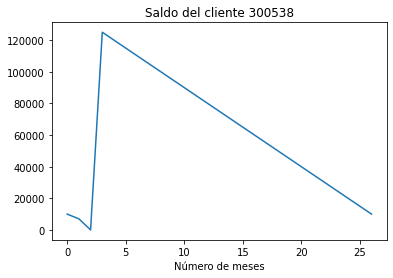

In [182]:
plot_client(300538)

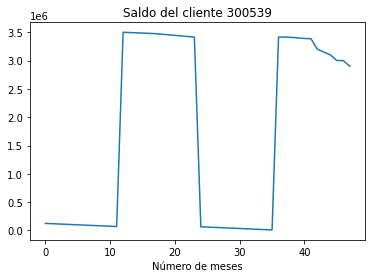

In [183]:
plot_client(300539)

# Actividad 4

In [115]:
interes_productos = {}
for _, row in hechos_df.iterrows():
    producto_id = row.Llave_producto
    if producto_id not in interes_productos:
        interes_productos[producto_id] = 0
    interes_productos[producto_id] += 1
print(interes_productos)

{40001: 24, 40028: 24, 40136: 24, 40082: 24, 40432: 3, 40366: 24, 40434: 24, 40323: 24, 40135: 24, 40433: 24}
